In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (354 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 57.2MB 57kB/s 


EasyOCR is Ready-to-use OCR with 40+ languages supported including Tamil, Japanese, Korean and Thai.

In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy  #For named entity recognition

In [4]:
#initialize easyocr
reader = easyocr.Reader(['en'])

In [11]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#If your resume is in pdf format use "convert_from_path"
images = convert_from_path('/content/drive/MyDrive/Certificate_/CV/Gulab_CV_updated1.pdf') #Location of pdf file  convert into image

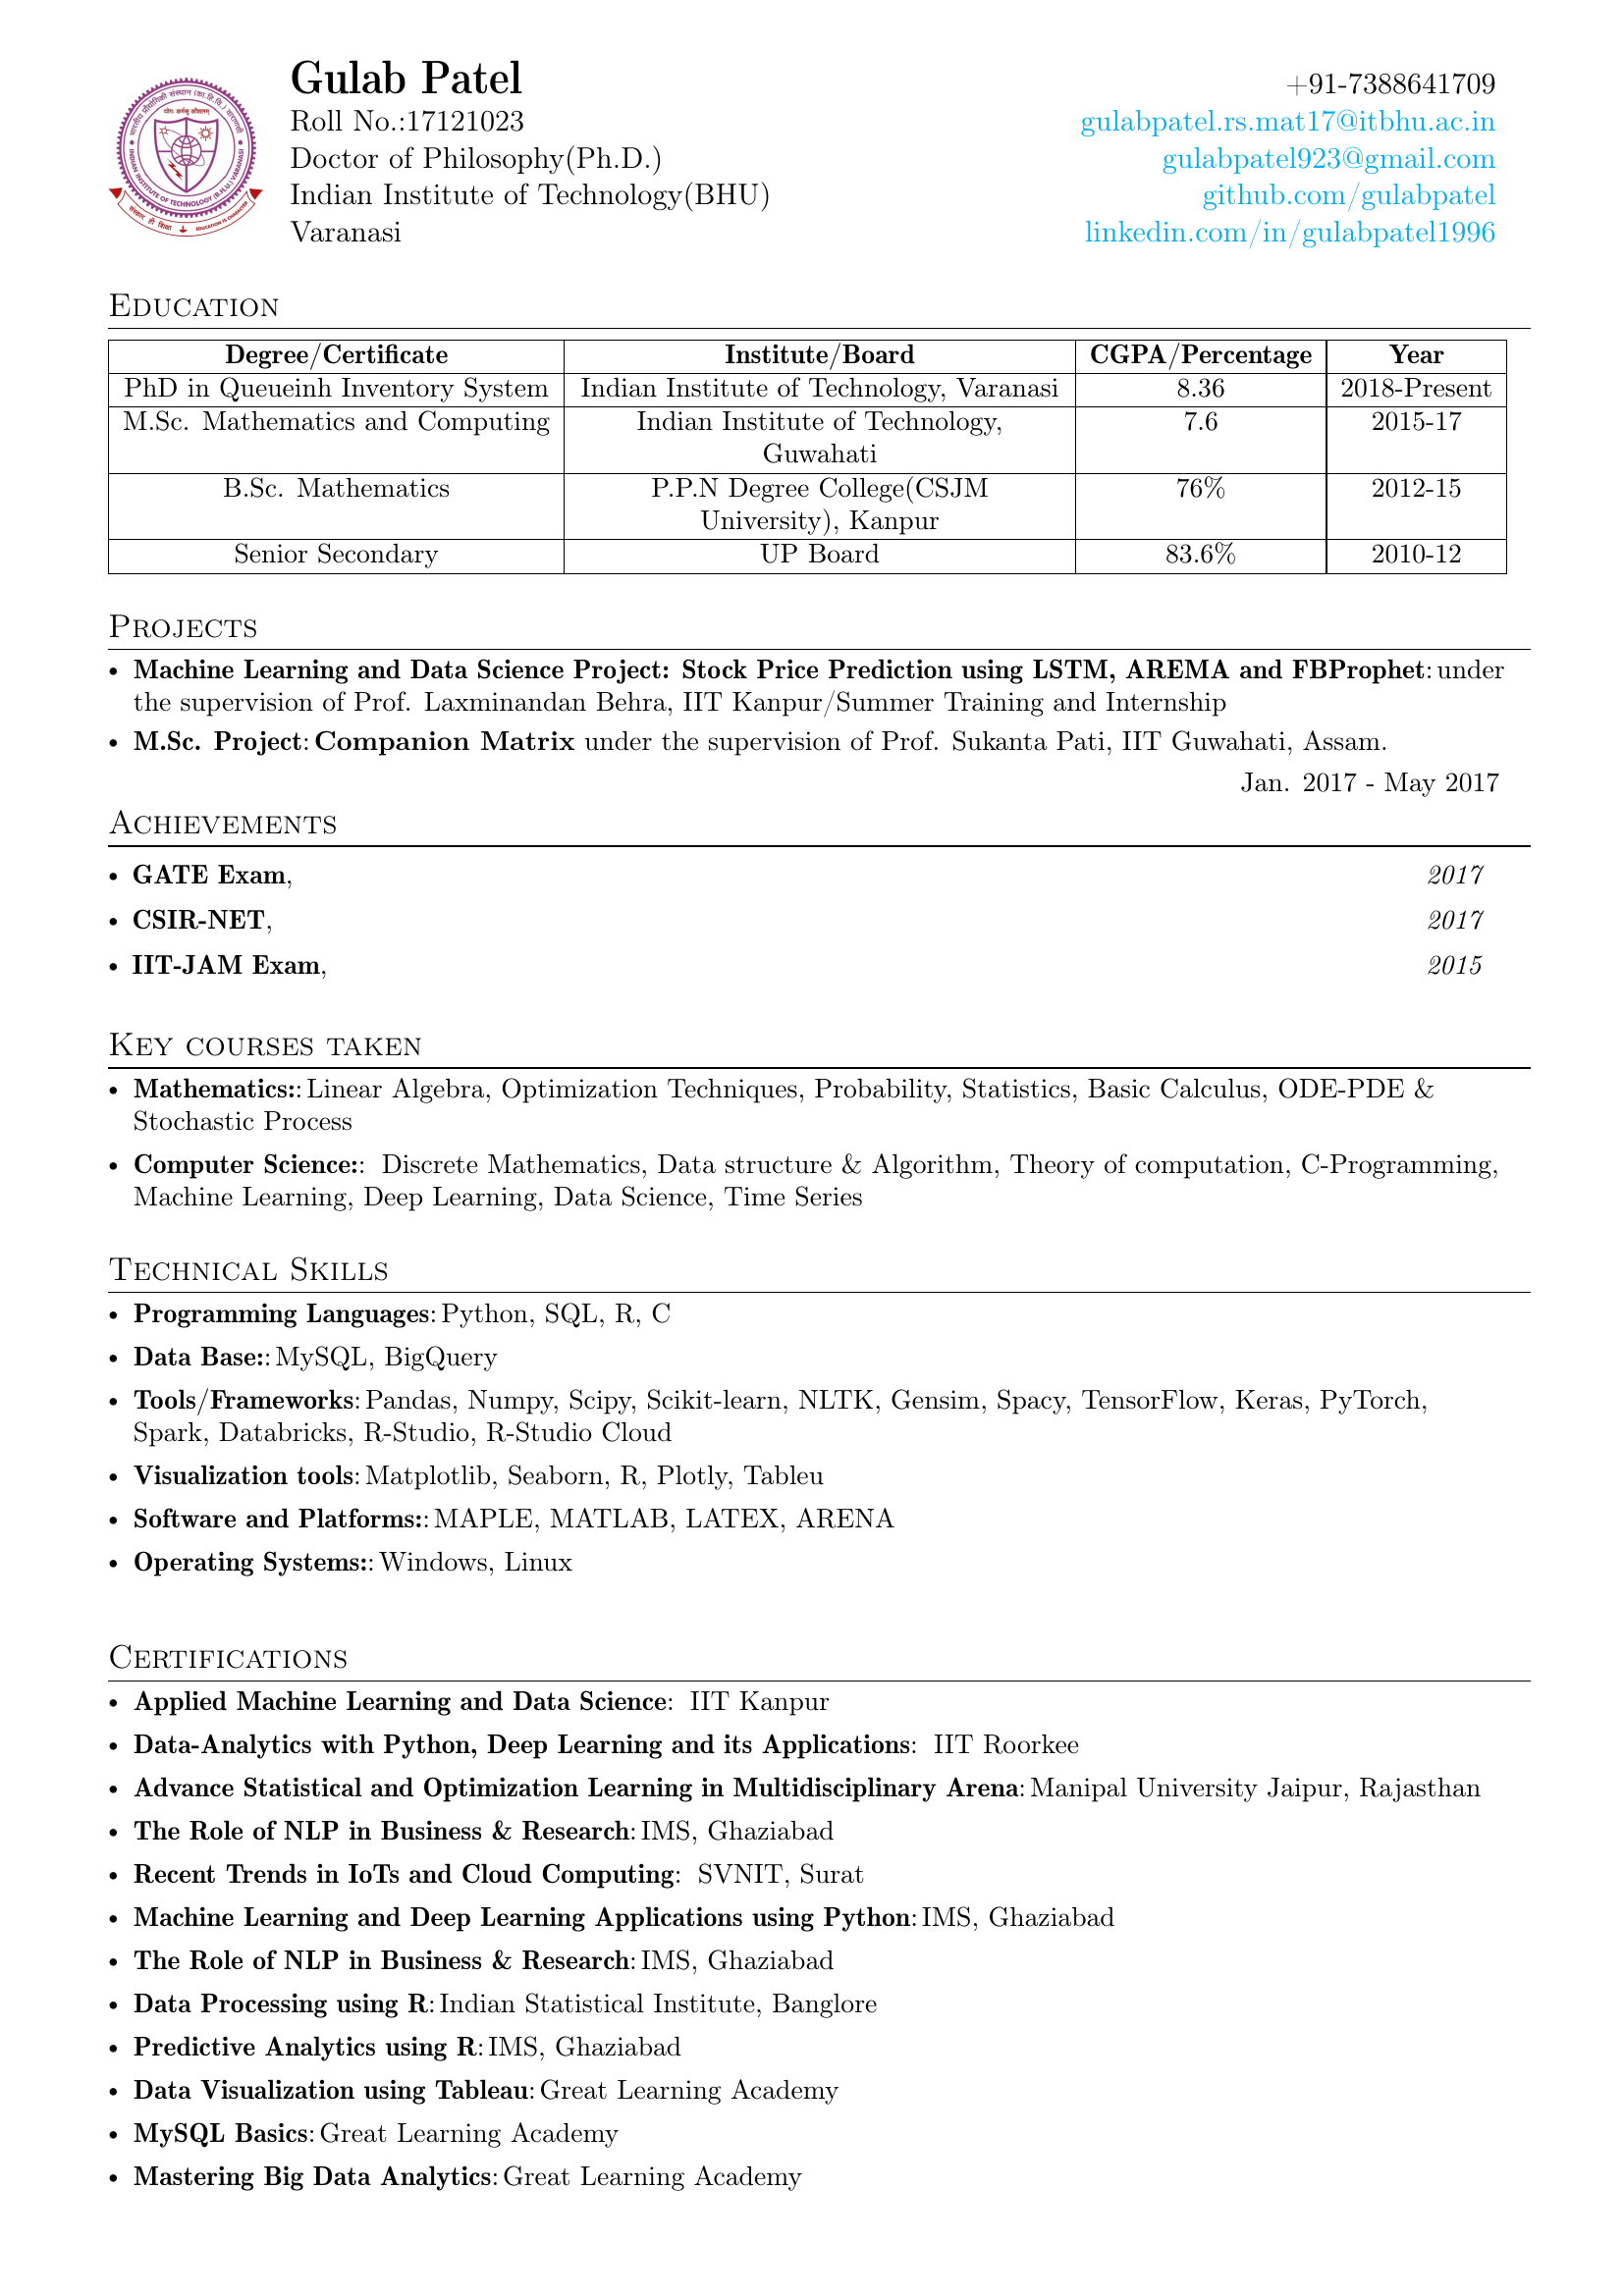

In [15]:
from IPython.display import display, Image
display(images[0])

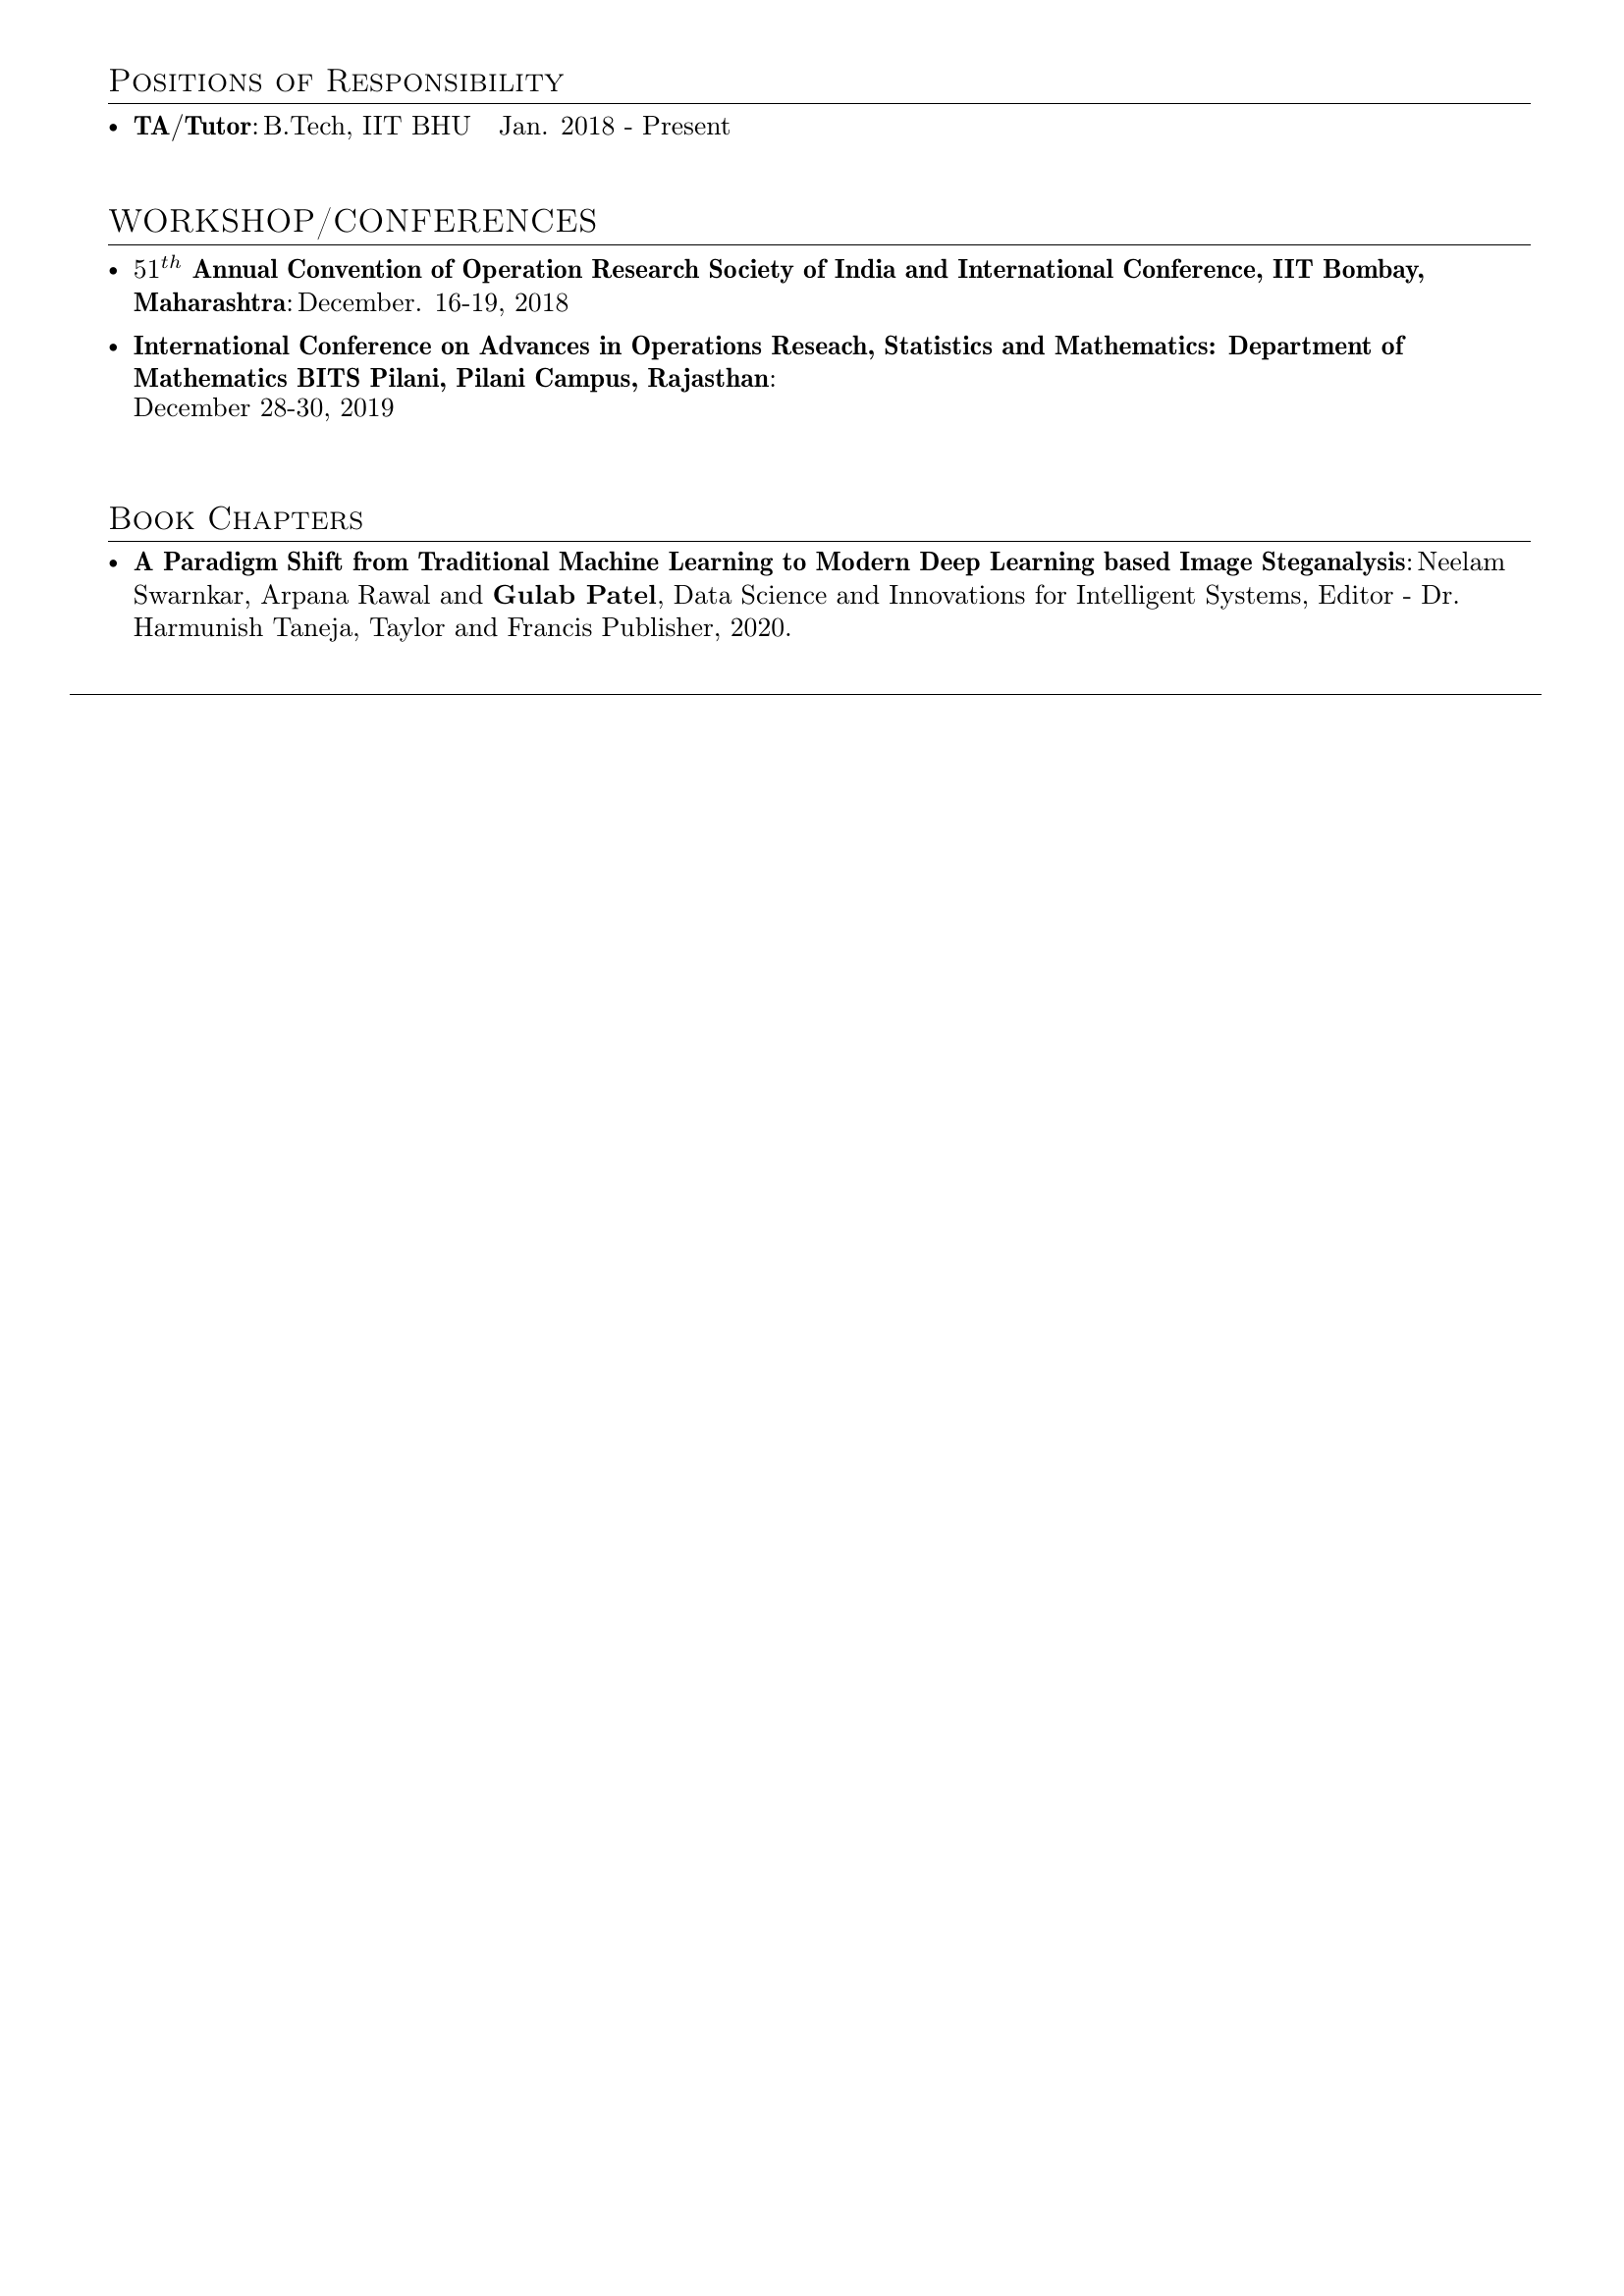

In [16]:
display(images[1])

In [20]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[289, 53], [538, 53], [538, 105], [289, 105]],
  'Gulab Patel',
  0.5610088109970093),
 ([[1307, 69], [1527, 69], [1527, 101], [1307, 101]],
  '+91-7388641709',
  0.6426852345466614),
 ([[1097, 105], [1528, 105], [1528, 147], [1097, 147]],
  'gulabpatel rs mat17@itbhu.ac.in',
  0.3454340398311615),
 ([[294, 108], [538, 108], [538, 140], [294, 140]],
  'Roll 1o.:17121023',
  0.2302033007144928),
 ([[1178, 141], [1527, 141], [1527, 186], [1178, 186]],
  'gulabpatel923@gmail.com',
  0.4460350573062897),
 ([[292, 144], [679, 144], [679, 183], [292, 183]],
  'Doctor of Philosophy(Ph.D.)',
  0.18108342587947845),
 ([[291, 177], [789, 177], [789, 222], [291, 222]],
  'Indian Institute of Technology(BHU)',
  0.376626580953598),
 ([[1220, 179], [1528, 179], [1528, 220], [1220, 220]],
  'github com gulabpatel',
  0.10092425346374512),
 ([[1099, 218], [1529, 218], [1529, 260], [1099, 260]],
  'linkedin. com /in gulabpatel1996',
  0.04591187462210655),
 ([[294, 222], [412, 222], [412, 250], [29

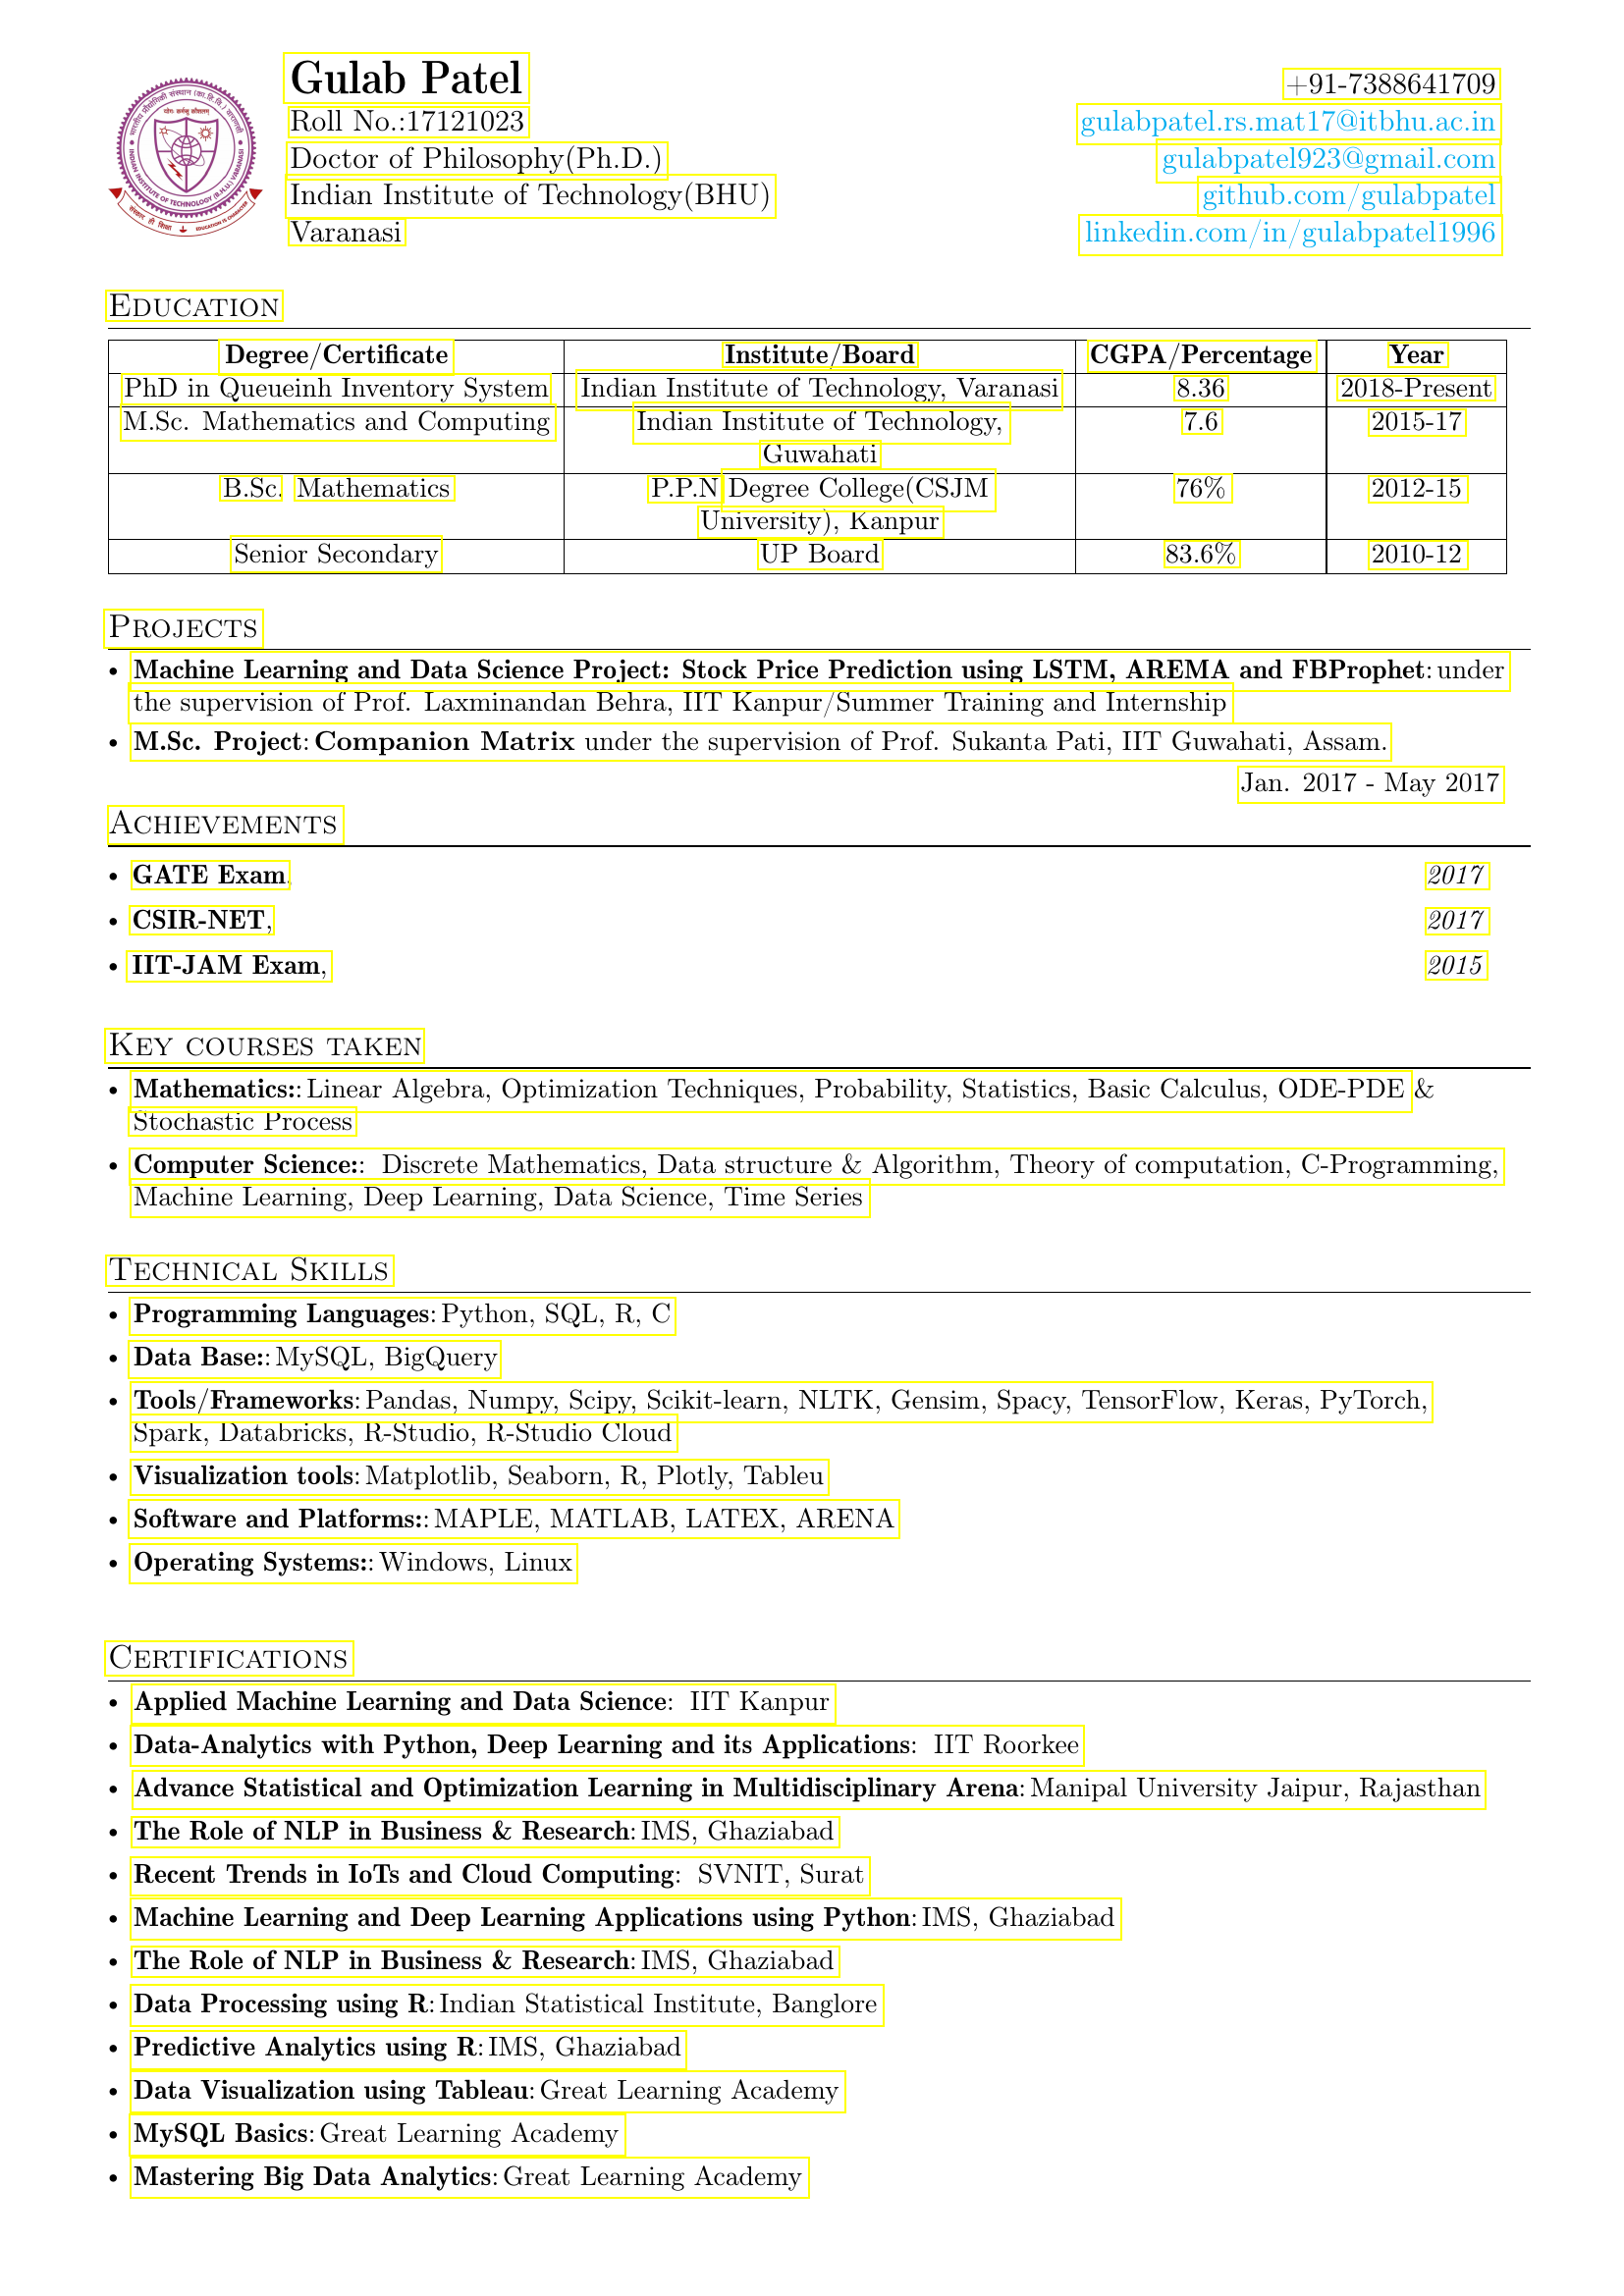

In [27]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [25]:
bounds[0][1] #print the particular bounding box name

'Gulab Patel'

In [31]:
#Iterate through the bounding box
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Gulab Patel
+91-7388641709
gulabpatel rs mat17@itbhu.ac.in
Roll 1o.:17121023
gulabpatel923@gmail.com
Doctor of Philosophy(Ph.D.)
Indian Institute of Technology(BHU)
github com gulabpatel
linkedin. com /in gulabpatel1996
Varanasi
EDUCATION
Degree /Certifcate
CGPA Percentage
Institute Board
Year
Indian Institute of Technology, Varanasi
PhD in Queueinh Inventory System
8.36
2O18-Present
Indian Institute of Technology,
M.Sc. Mathematics and Computing
7.6
2015-17
Guwahati
Degree College(CSJM
76%
B.Sc
Mathematics
PPN
2012-15
University), Kanpur
Senior Secondary
UP Board
83.6%
2010-12
PROJECTS
Machine Learning and Data Science Project: Stock Price Prediction using LSTM, AREMA and FBProphet: under
the supervision of Prof. Laxminandan Behra, IIT Kanpur/Summer Training and Internship
M.Sc. Project: Companion Matrix under the supervision of Prof. Sukanta Pati, IIT Guwahati, Assam.
Jan. 2OI7- May 2017
ACHIEVEMENTS
GATE Exam
2017
CSIR-NET
2017
IIT JAM Exam,
2015
KEY COURSES TAKEN
Mathematics:: Line

#Spacy for NER

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [32]:
doc = nlp(text)

In [35]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)

--------------